# TRANSFORMATIONS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.plotting import bootstrap_plot
import scipy.stats as stats

In [4]:
df = pd.read_csv('calories_consumed.csv')

In [6]:
df.shape

(14, 2)

In [7]:
df.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [8]:
#looking for outliers
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')

<Figure size 432x288 with 0 Axes>

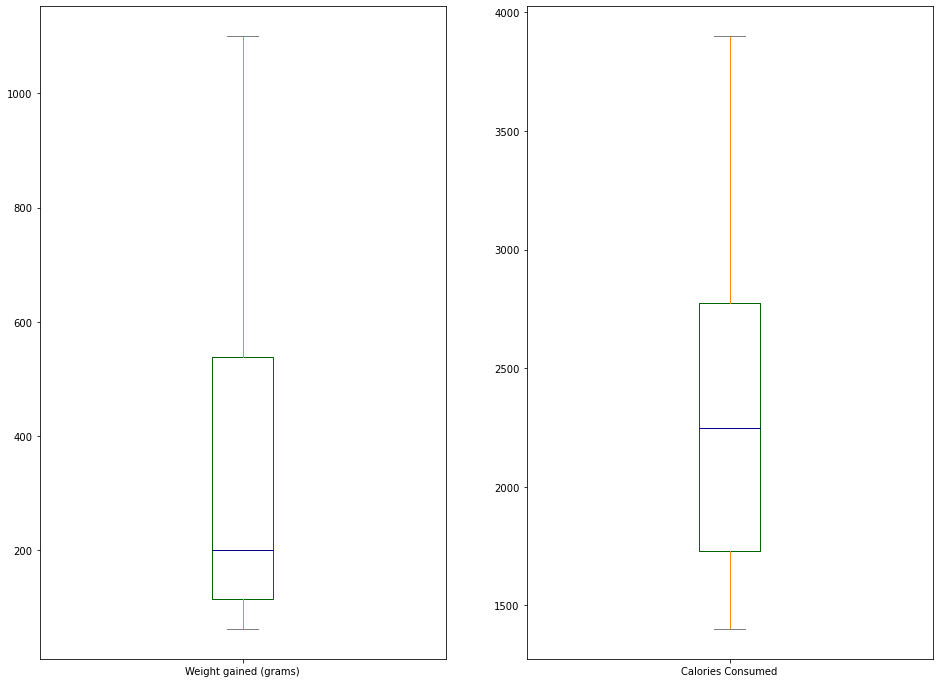

<Figure size 432x288 with 0 Axes>

In [9]:
df.plot(kind = 'box', subplots = bool,figsize = (16, 12),color=color)
plt.figure() #from fig there is no outliers in dataset

In [11]:
df

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


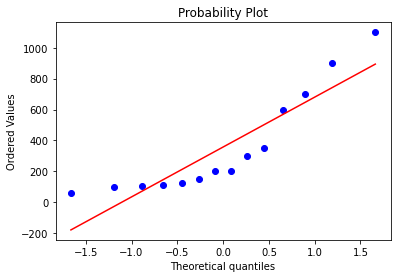

In [13]:
#we looking Q-Q plot
stats.probplot(df['Weight gained (grams)'], dist = 'norm', plot = plt)
plt.show()

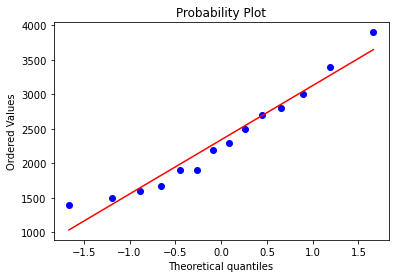

In [14]:
stats.probplot(df['Calories Consumed'], dist = 'norm', plot = plt)
plt.show()

<Figure size 432x288 with 0 Axes>

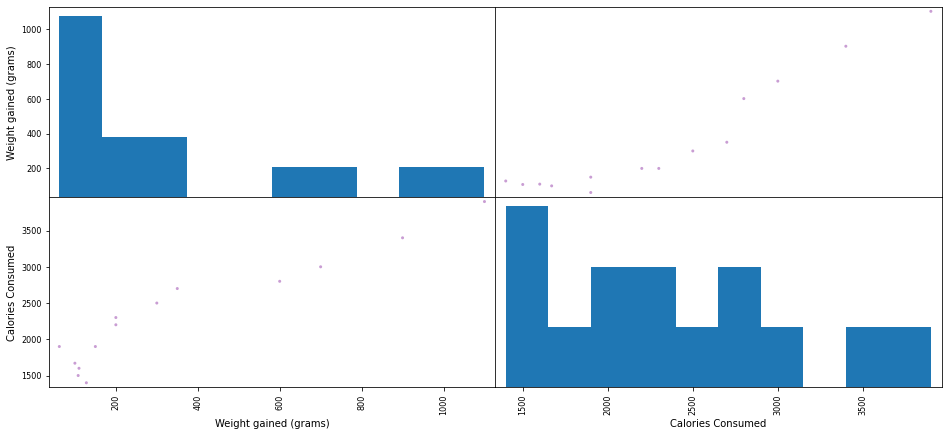

<Figure size 432x288 with 0 Axes>

In [16]:
scatter_matrix(df[['Weight gained (grams)','Calories Consumed']],figsize = (16,7), alpha = 0.7,color = '#b274c1')
plt.figure()

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt = PowerTransformer(method = 'box-cox')

In [25]:
data = np.array(df['Weight gained (grams)']).reshape(-1,1)

In [27]:
df['Transformed_wtGained'] = pt.fit_transform(data)

In [29]:
data1 = np.array(df['Calories Consumed']).reshape(-1,1)

In [30]:
df['Transformed_CalCons'] = pt.fit_transform(data)

In [31]:
df

,Weight gained (grams),Calories Consumed,Transformed_wtGained,Transformed_CalCons
0,108,1500,-0.931125,-0.931125
1,200,2300,-0.127195,-0.127195
2,900,3400,1.410901,1.410901
3,200,2200,-0.127195,-0.127195
4,300,2500,0.342022,0.342022
5,110,1600,-0.905474,-0.905474
6,128,1400,-0.697774,-0.697774
7,62,1900,-1.761340,-1.761340
8,600,2800,1.047979,1.047979
9,1100,3900,1.578182,1.578182


<Figure size 432x288 with 0 Axes>

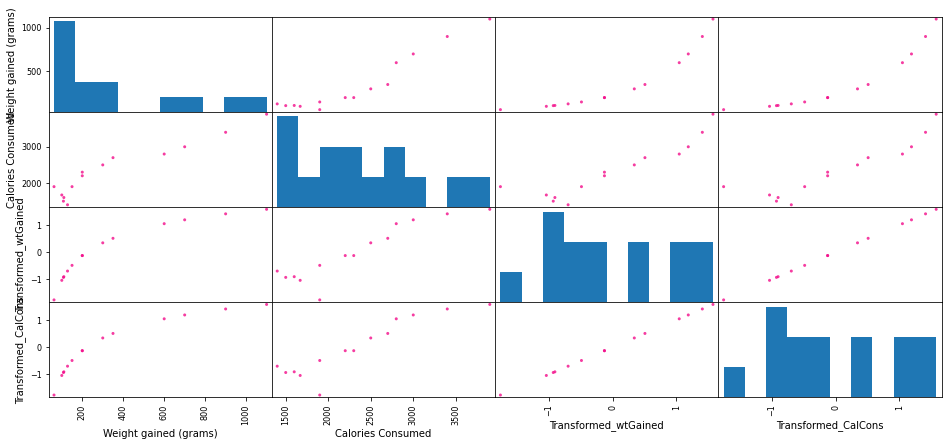

<Figure size 432x288 with 0 Axes>

In [34]:
scatter_matrix(df[['Weight gained (grams)','Calories Consumed','Transformed_wtGained','Transformed_CalCons']],figsize = (16,7), alpha = 0.8,color = '#f30c8a')
plt.figure()

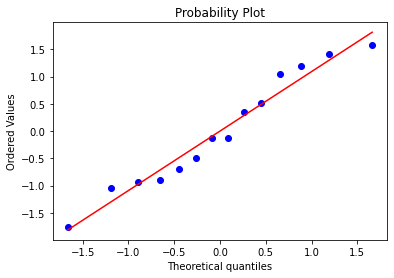

In [35]:
stats.probplot(df['Transformed_wtGained'], dist = 'norm', plot = plt)
plt.show() #we can see clear change in after transformation

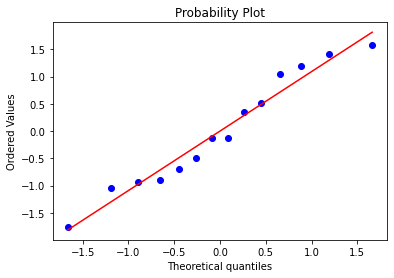

In [36]:
stats.probplot(df['Transformed_CalCons'], dist = 'norm', plot = plt)
plt.show() #we can see clear change in after transformation